<a href="https://colab.research.google.com/github/AhmedNasser1601/Stock-Analysis/blob/Main/Stock_Analysis_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Name: Ahmed Nasser Ahmed Hassan***
> **CodeClause |> *Sep/2022***
>> **Data Science Intern |> *CC-OL-911***
>>> **Task1 >> *Stock Analysis***
---

> ### |> ***Requirements***

>> #### |> ***Import Packages***

In [1]:
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pandas_datareader as data
import seaborn as sns

from datetime import datetime

from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

>> #### |> ***Download Dataset with API_Token***
>> "username":"ahmednasser1601"

In [2]:
!pip install jovian opendatasets --upgrade --quiet
!pip install -q kaggle

import urllib.request
import opendatasets as od

od.download("https://www.kaggle.com/datasets/pritsheta/netflix-stock-data-from-2002-to-2021")

     |████████████████████████████████| 68 kB 5.7 MB/s 
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ahmednasser1601
Your Kaggle Key: ··········


100%|██████████| 92.7k/92.7k [00:00<00:00, 26.9MB/s]

In [3]:
df = pd.read_csv('netflix-stock-data-from-2002-to-2021/NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100




---



> ### |> ***Analysis***

Text(0.5, 1.0, 'Stock Volume versus Time')

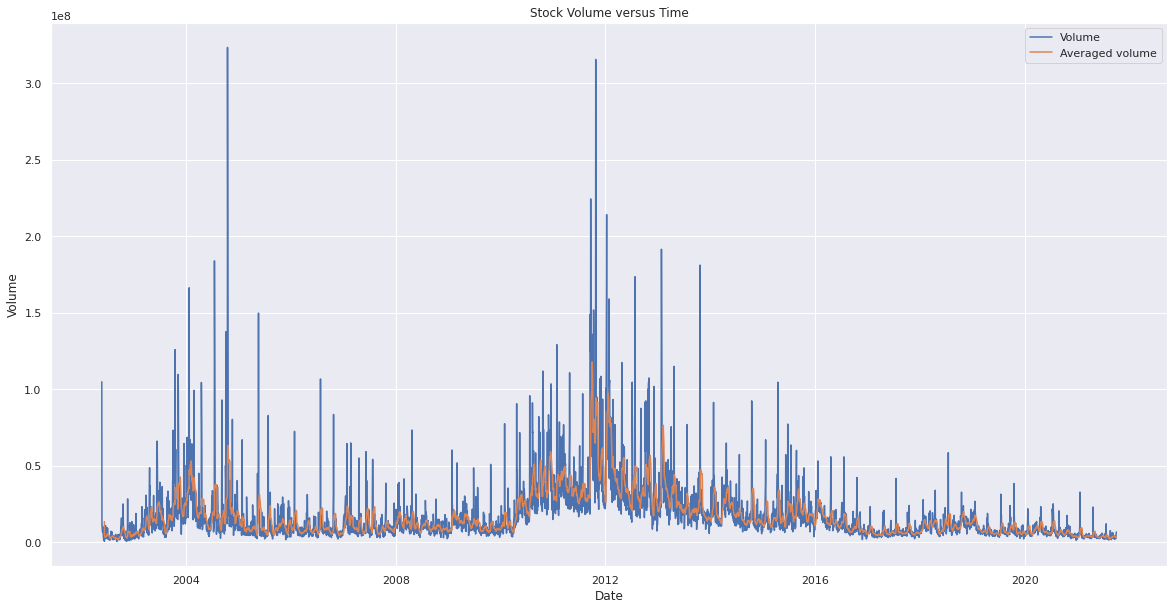

In [4]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x=df.index,y=df['Volume'],label='Volume')
sns.lineplot(x=df.index,y=df['Volume'].rolling(window=12).mean(),label='Averaged volume')
plt.title('Stock Volume versus Time')

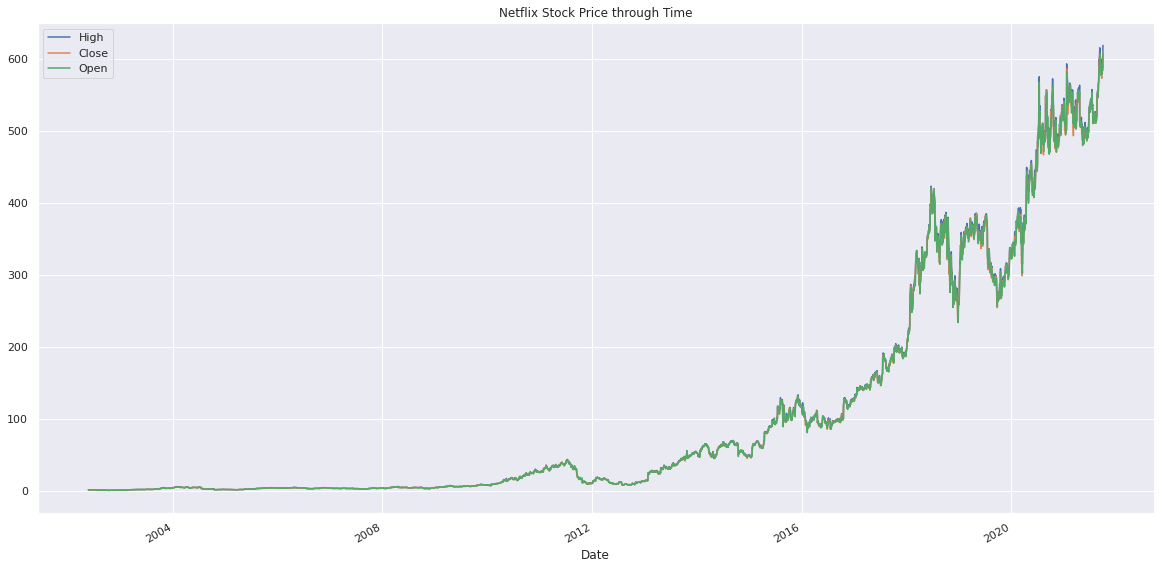

In [5]:
df.plot(y=['High','Close','Open'],title='Netflix Stock Price through Time')

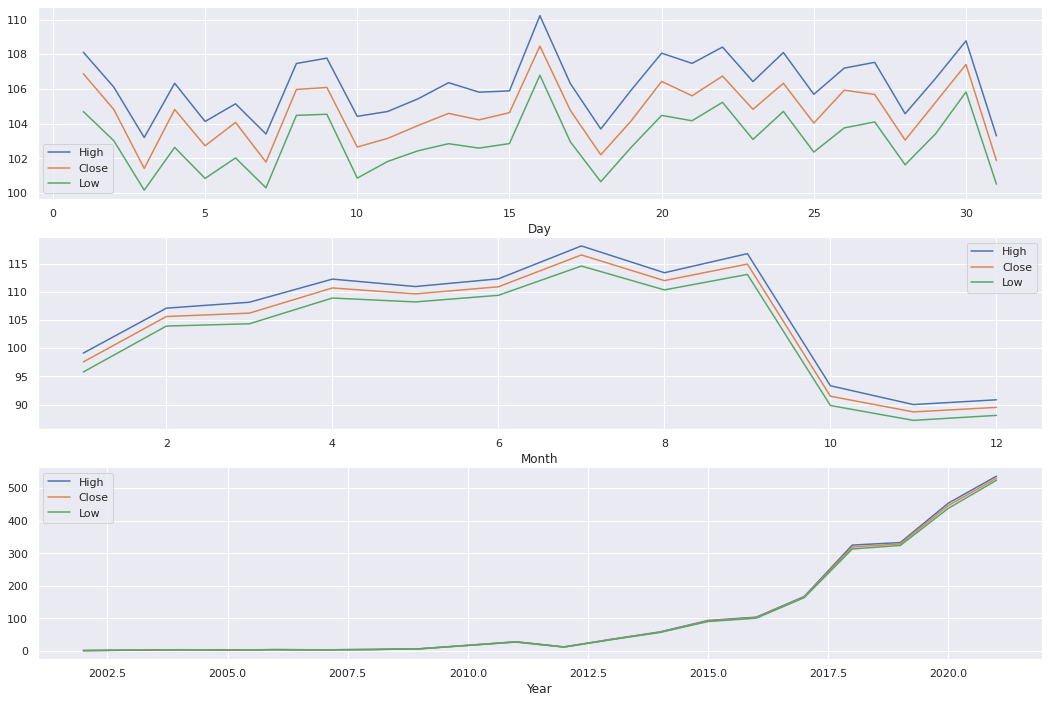

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(18, 12))

df.groupby(df.index.day).mean().plot(y=['High', 'Close', 'Low'], ax=ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y=['High', 'Close', 'Low'], ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y=['High', 'Close', 'Low'], ax=ax3, xlabel='Year')

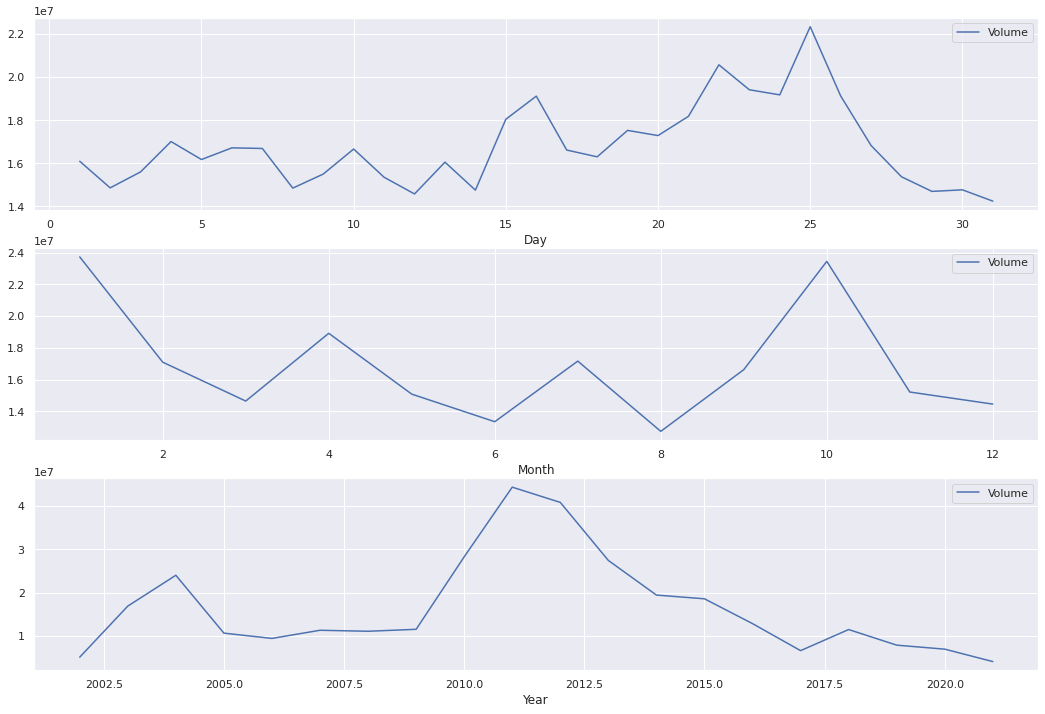

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(18, 12))

df.groupby(df.index.day).mean().plot(y='Volume', ax=ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y='Volume', ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y='Volume', ax=ax3, xlabel='Year')

---

In [8]:
def plot_mean_std_time(data, featureName, chunkSize, title):
    feature = data[featureName]
    chunks = np.split(feature, chunkSize)

    means = [np.mean(chunk) for chunk in chunks]
    stds = [np.std(chunk) for chunk in chunks]
    title += ' -> through Time'
    
    plt.title(title)
    
    plt.plot(np.arange(len(means)), [feature.mean()] * len(means), label='Global [Mean]', lw=1.5, color='green')
    plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100, color='green')

    plt.plot(np.arange(len(stds)), [feature.std()] * len(stds), label='Global [STD]', lw=1.5, color='orange')
    plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', s=100, color='orange')

    plt.legend()

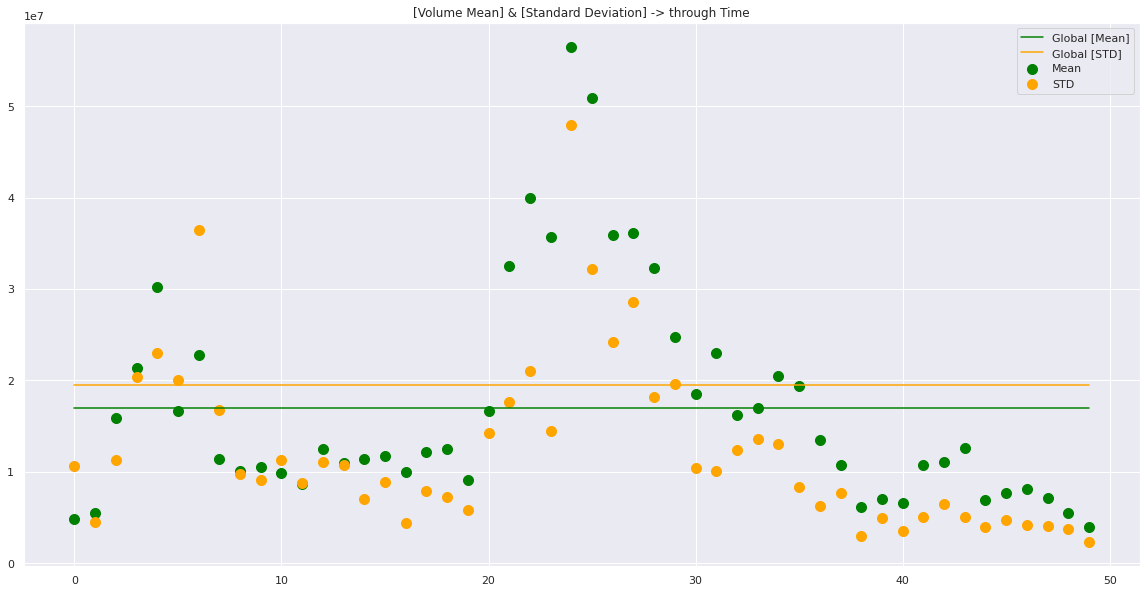

In [9]:
plot_mean_std_time(df.iloc[:4800], 'Volume', 50, '[Volume Mean] & [Standard Deviation]')

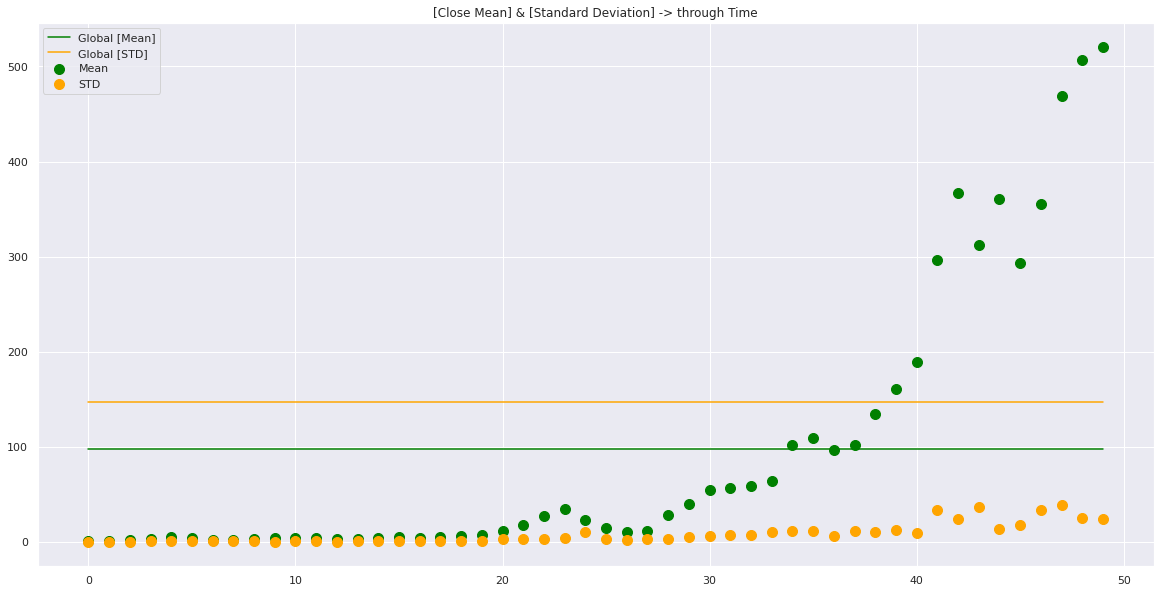

In [10]:
plot_mean_std_time(df.iloc[:4800], 'Close', 50, '[Close Mean] & [Standard Deviation]')



---



Text(0.5, 1.0, 'Volume Autocorrelation')

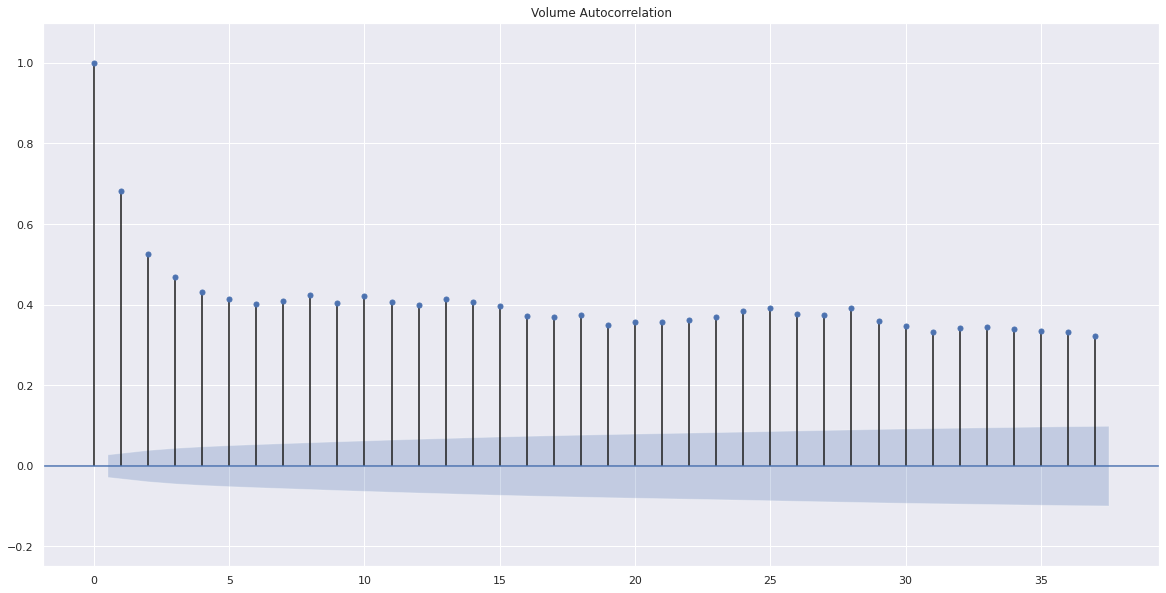

In [11]:
plot_acf(df['Volume'])
plt.ylim([-0.25, 1.1])
plt.title('Volume Autocorrelation')

Text(0.5, 1.0, 'Close Autocorrelation')

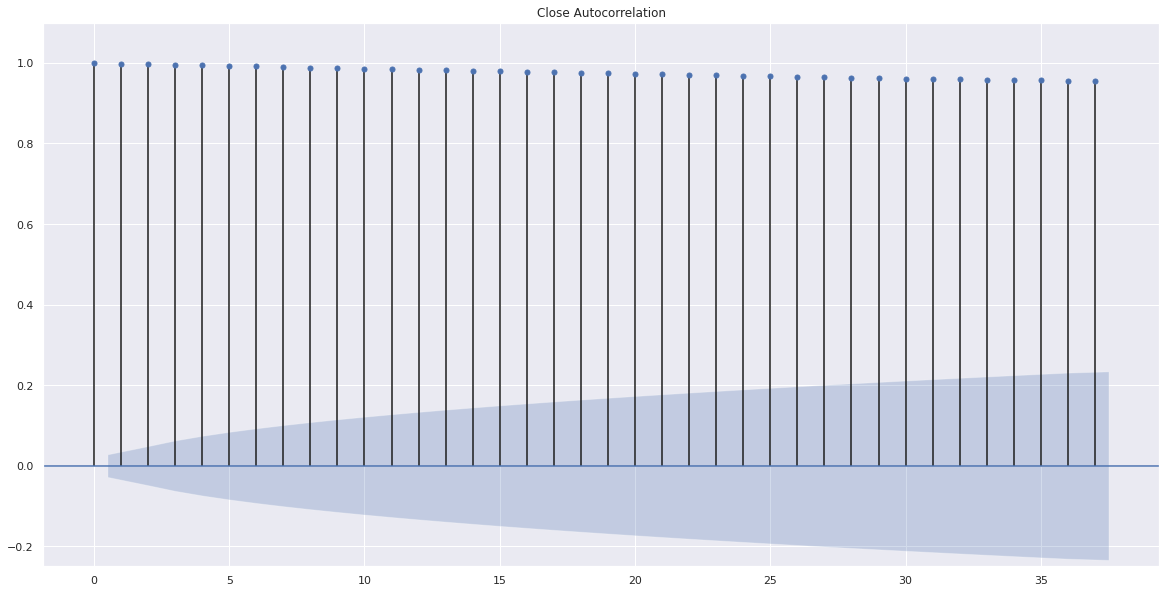

In [12]:
plot_acf(df['Close'])
plt.ylim([-0.25, 1.1])
plt.title('Close Autocorrelation')



---



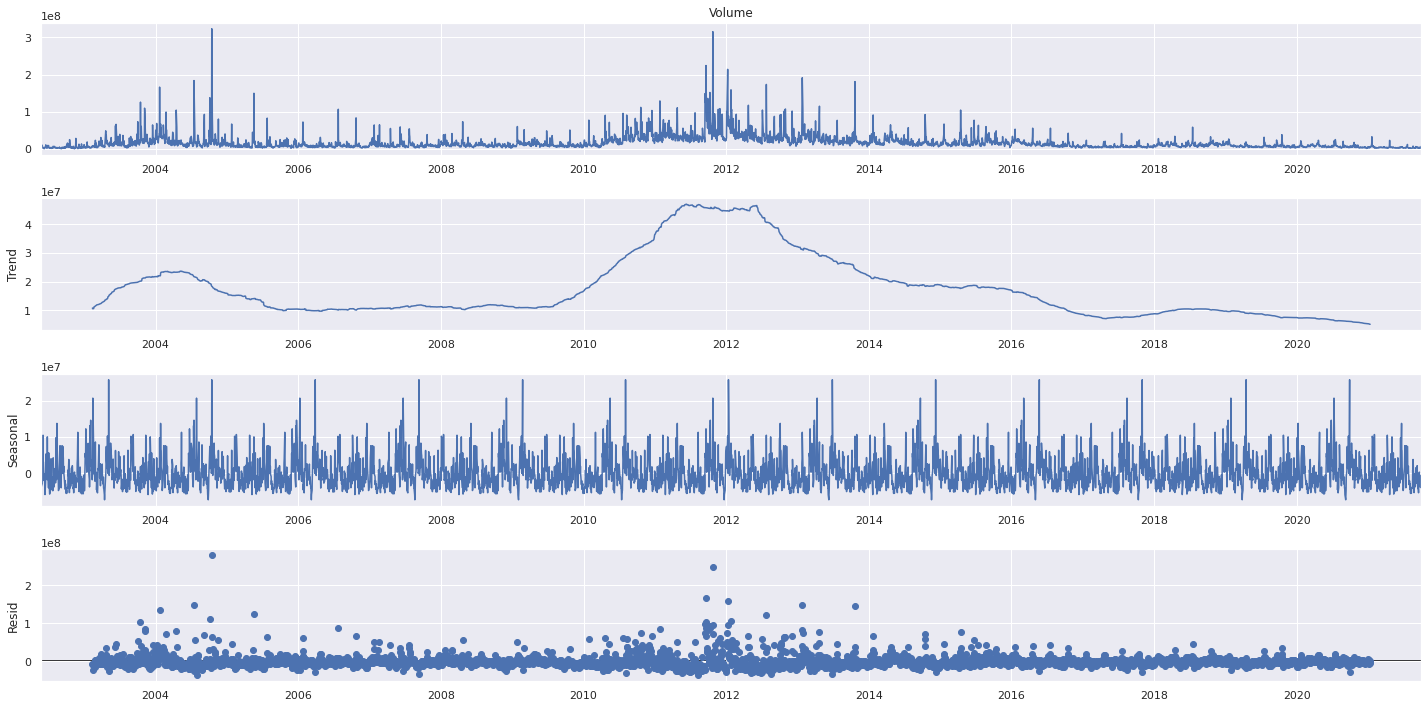

In [13]:
seasonal_decompose(df['Volume'], period=365, model='additive').plot();

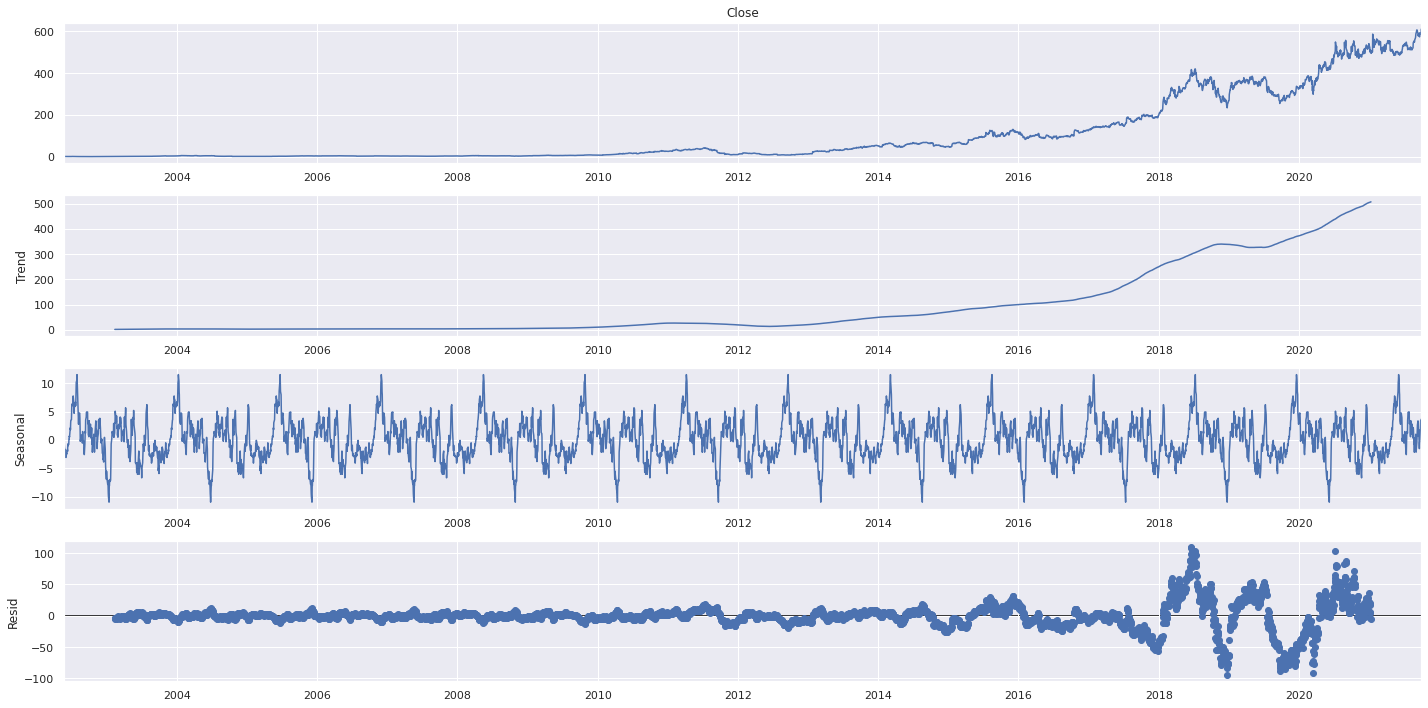

In [14]:
seasonal_decompose(df['Close'], period=365, model='additive').plot();



---



> ### |> ***Stationary Test (ADF Test)***
>> Augmented Dickey Fuller test (ADF Test)
- is a common statistical test used to test whether a given Time series is stationary or not.

In [15]:
adf_df = pd.DataFrame(data=adfuller(df['Close']),
                      columns=['Values'],
                      index=['Test statistic',
                             'P-value',
                             'Number of lags',
                             'Number of observation',
                             'Critical values',
                             'Information criteria']
                      )
adf_df

,Values
Test statistic,2.793546
P-value,1.0
Number of lags,30
Number of observation,4843
Critical values,"{'1%': -3.4317009744827818, '5%': -2.862136980..."
Information criteria,28372.64919


In [16]:
diff1 = df['Close'].diff(1)[1:]
p_value = adfuller(diff1)
p_value

(-12.296601918385486,
 7.61425582797595e-23,
 32,
 4840,
 {'1%': -3.431701812308405,
  '5%': -2.8621373505170724,
  '10%': -2.5670879711512193},
 28348.422758580997)

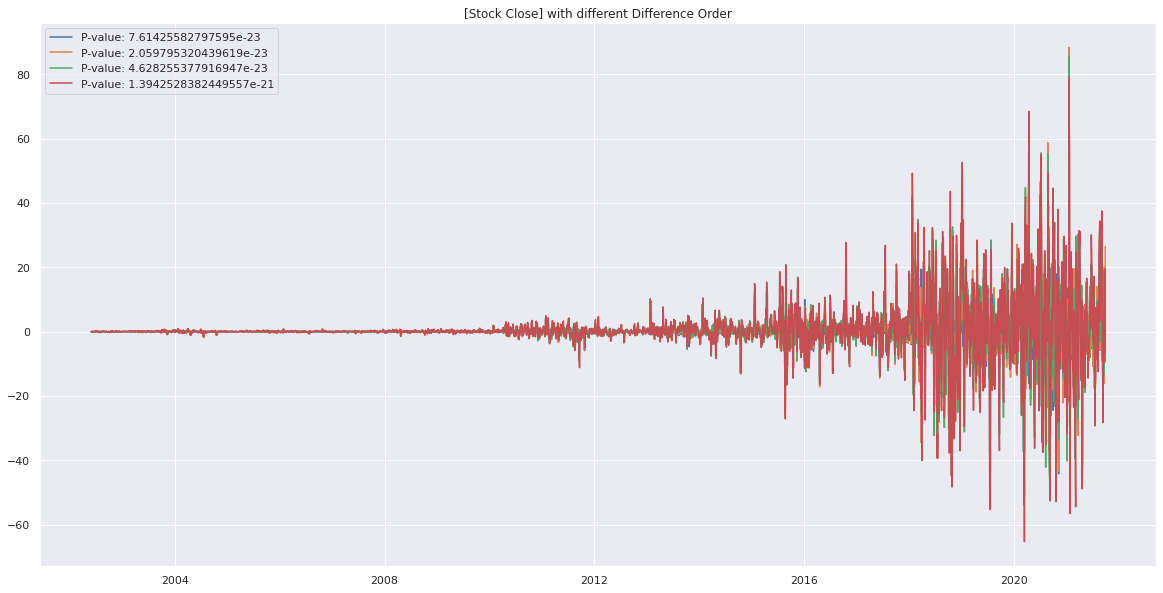

In [17]:
plt.title('[Stock Close] with different Difference Order')

for i in range(1, 5):
    p_value = adfuller(df['Close'].diff(i)[i:])[1]
    plt.plot(df['Close'].diff(i).dropna(), label=f'P-value: {p_value}')

plt.legend();

In [18]:
def make_stationary(data: pd.Series, alpha=0.05, max_diff=10):
    if adfuller(data)[1] < alpha:
      return {'diff_order':0, 'time_series': data}
    
    p_values = [(i,adfuller(data.diff(i).dropna())[1]) for i in range(1,max_diff)]

    significant = [p for p in p_values if p[1] < alpha]
    significant = sorted(significant, key=lambda x: x[1])

    diff_order = significant[0][0]

    return {'diff_order': diff_order, 'time_series': np.array(data.diff(diff_order).dropna())}

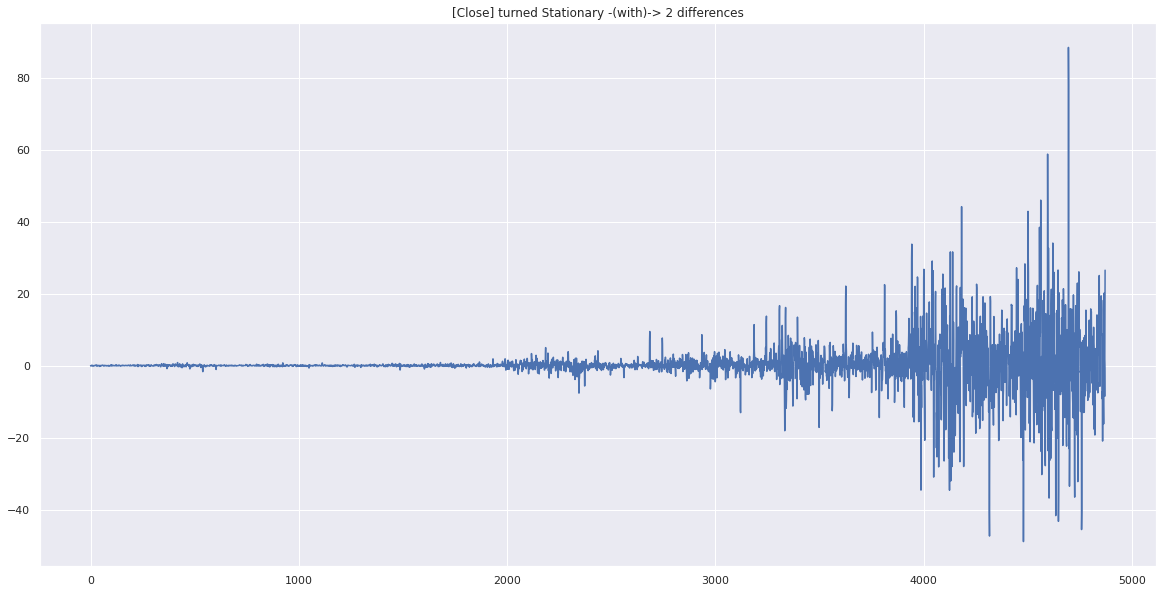

In [19]:
data = make_stationary(df['Close'])
plt.title(f"[Close] turned Stationary -(with)-> {data['diff_order']} differences")
plt.plot(data['time_series'])

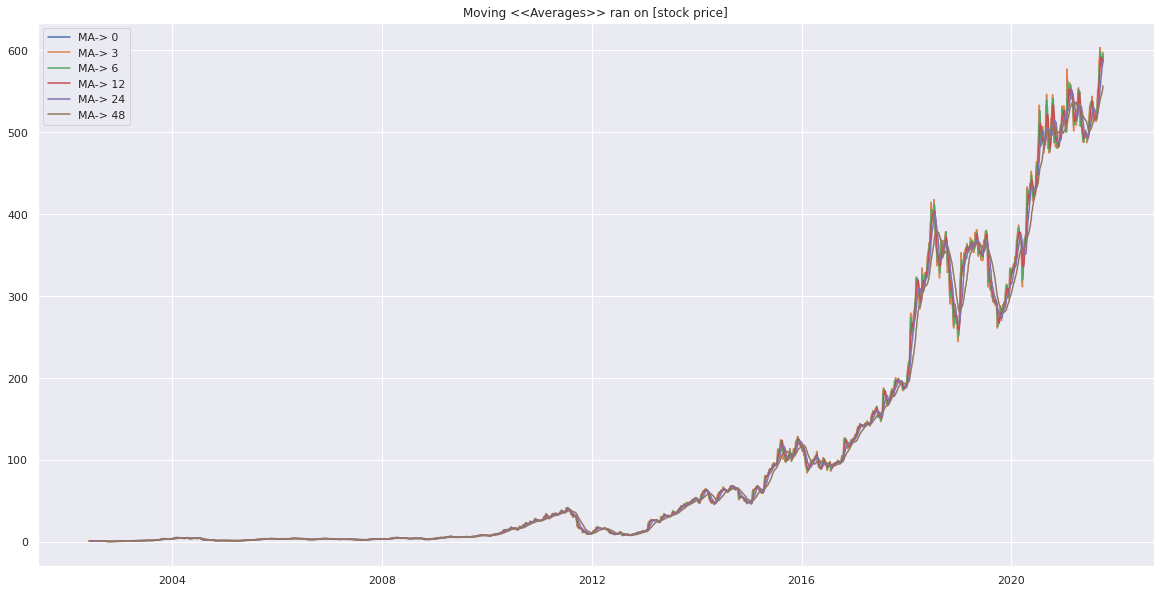

In [20]:
plt.title('Moving <<Averages>> ran on [stock price]')

for i in [0, 3, 6, 12, 24, 48]:
    plt.plot(df.rolling(i).mean() ['Close'], label=f'MA-> {i}')

plt.legend()



---



> ### |> ***Run ARIMA Model***

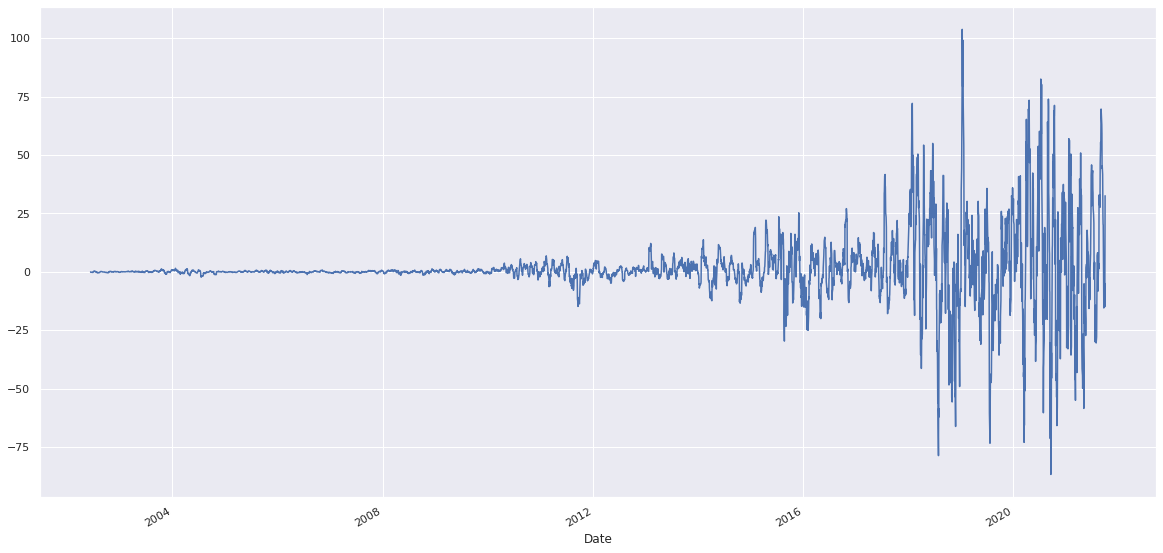

In [21]:
seas_diff = df['Close'] - df['Close'].shift(12)
seas_diff.plot()

In [22]:
adfuller(seas_diff.dropna())

(-10.909802755805154,
 1.1043216014983642e-19,
 32,
 4829,
 {'1%': -3.4317048932467036,
  '5%': -2.862138711638667,
  '10%': -2.56708869573285},
 29683.740701656396)

- p-value is below 0.05 so no need to differnce


---


- Estimating p,q through Autocorrelation and Partial Autocorrelation.

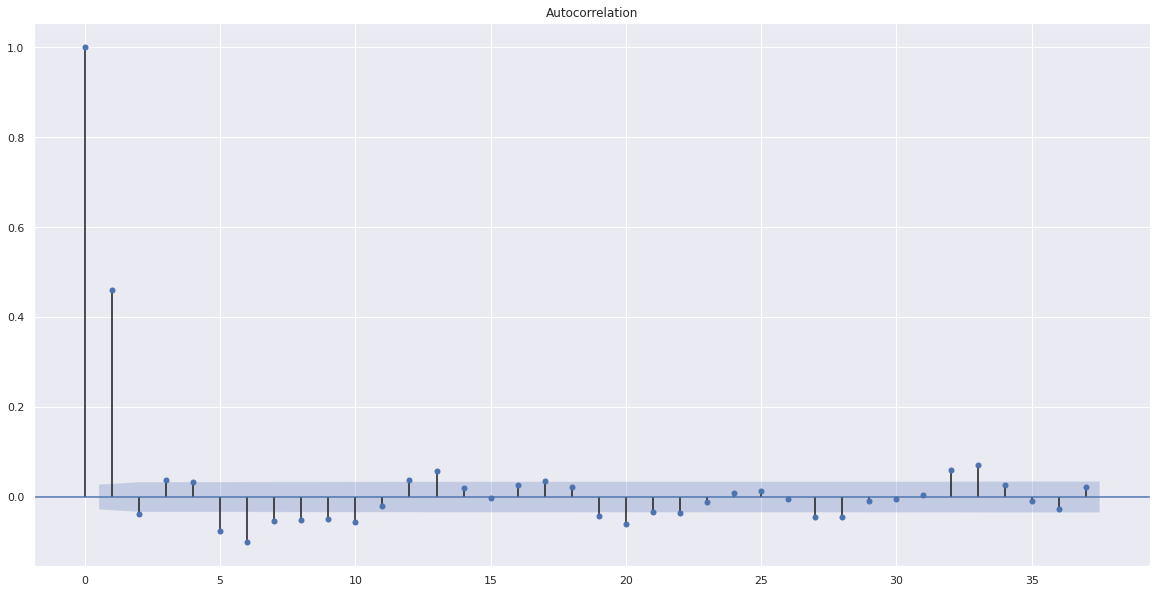

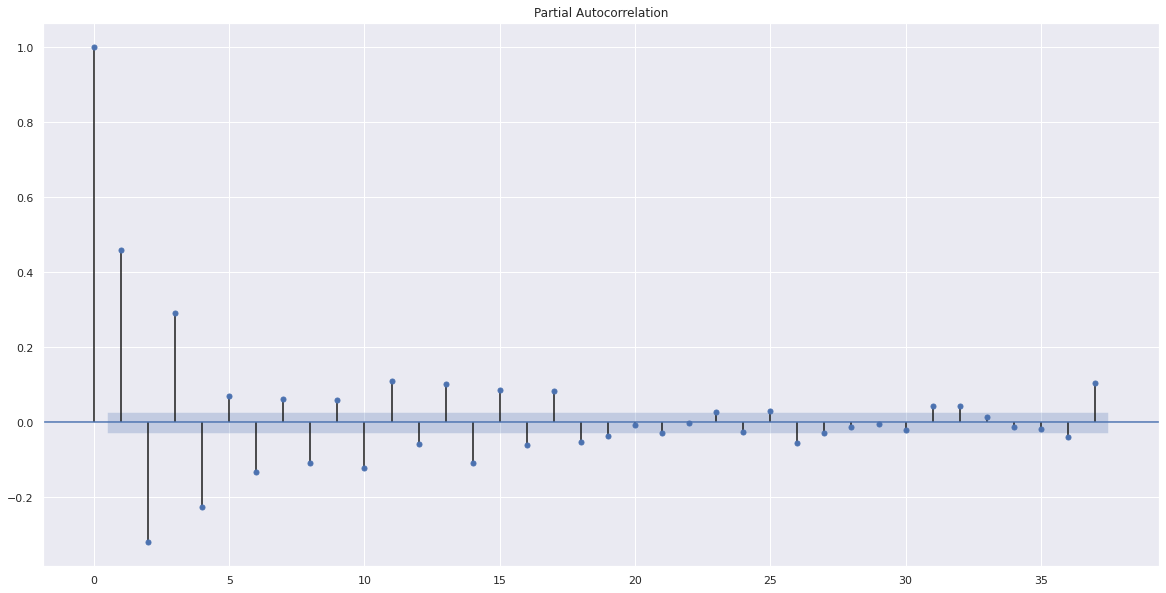

In [23]:
plot_acf(df['Close'].diff(2).dropna())
plot_pacf(df['Close'].diff(2).dropna());

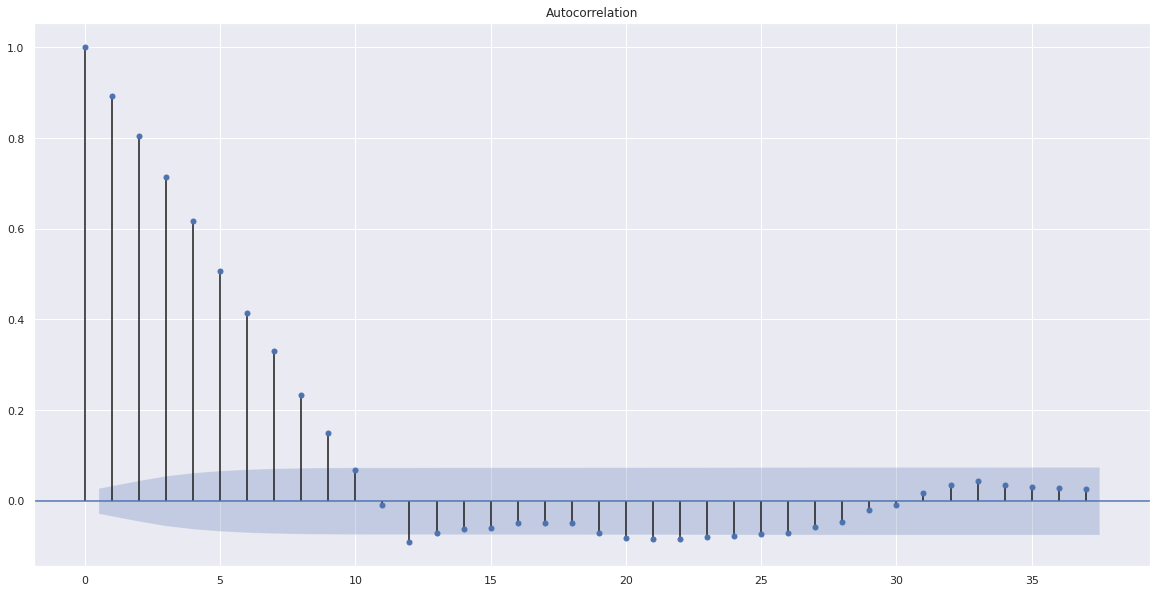

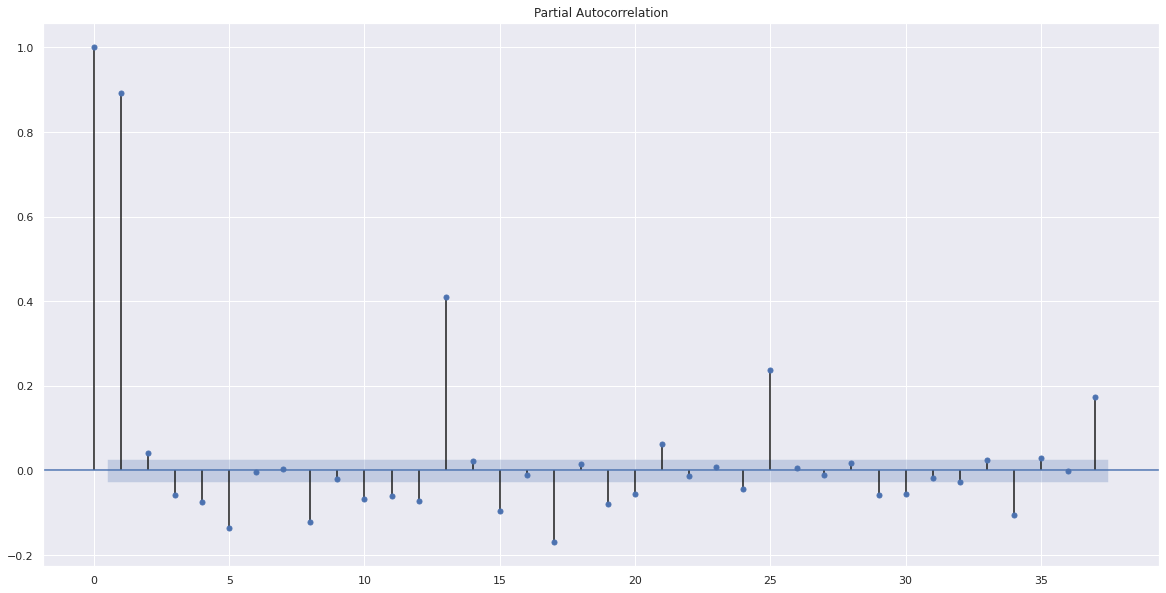

In [24]:
plot_acf(seas_diff.dropna())
plot_pacf(seas_diff.dropna());

In [25]:
stationary_ts = df['Close'].diff(2).dropna()
stationary_ts = stationary_ts.resample('M').mean()
train_len = int(0.7*len(stationary_ts))

In [26]:
model = SARIMAX(stationary_ts.iloc[:train_len], 
                order=(1, 2, 1),
                seasonal_order=(1, 0, 0, 12))

result = model.fit()

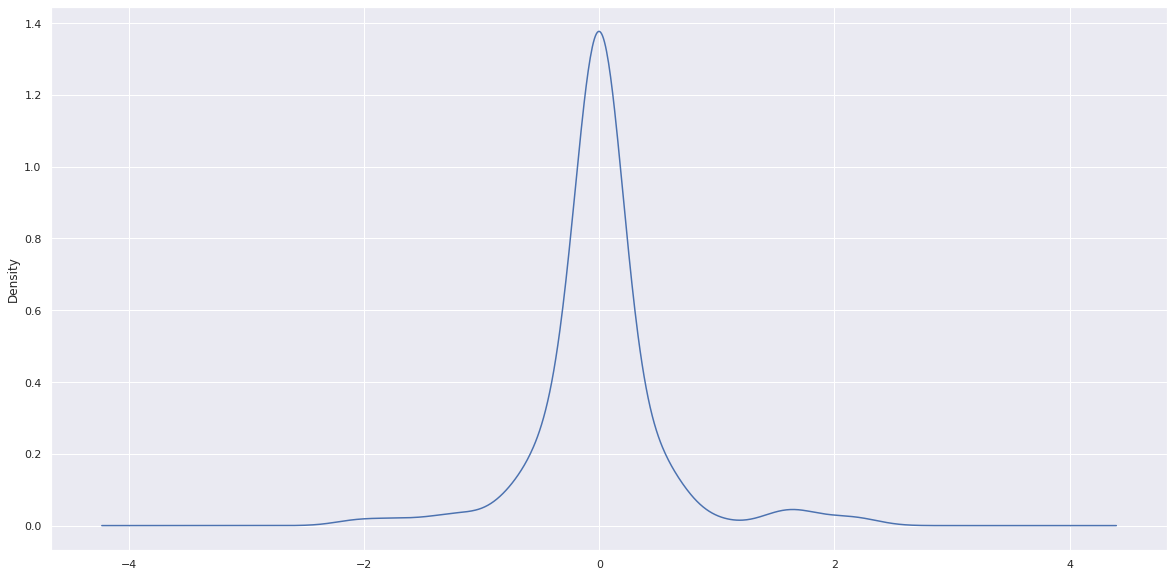

In [27]:
result.resid.plot(kind='kde')



---



> ### |> ***Predicting Stock Price***

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


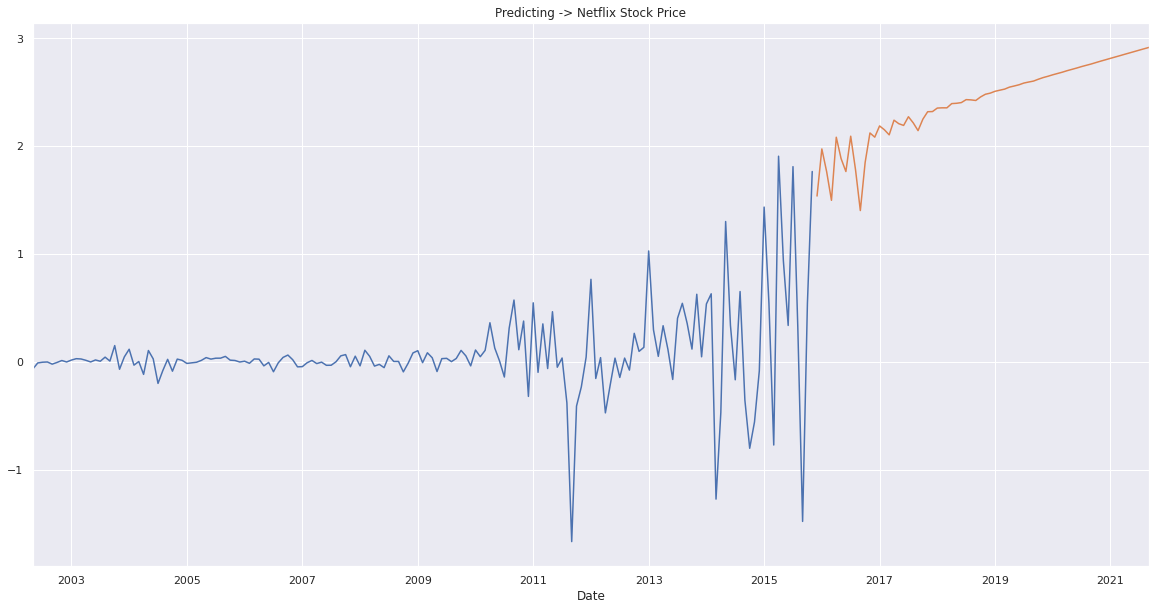

In [28]:
start, end = stationary_ts.index.values[train_len], stationary_ts.index.values[-1]
predictions = result.predict(start=start, end=end)

plt.title('Predicting -> Netflix Stock Price')
stationary_ts.iloc[:train_len].plot()

predictions.dropna().plot()

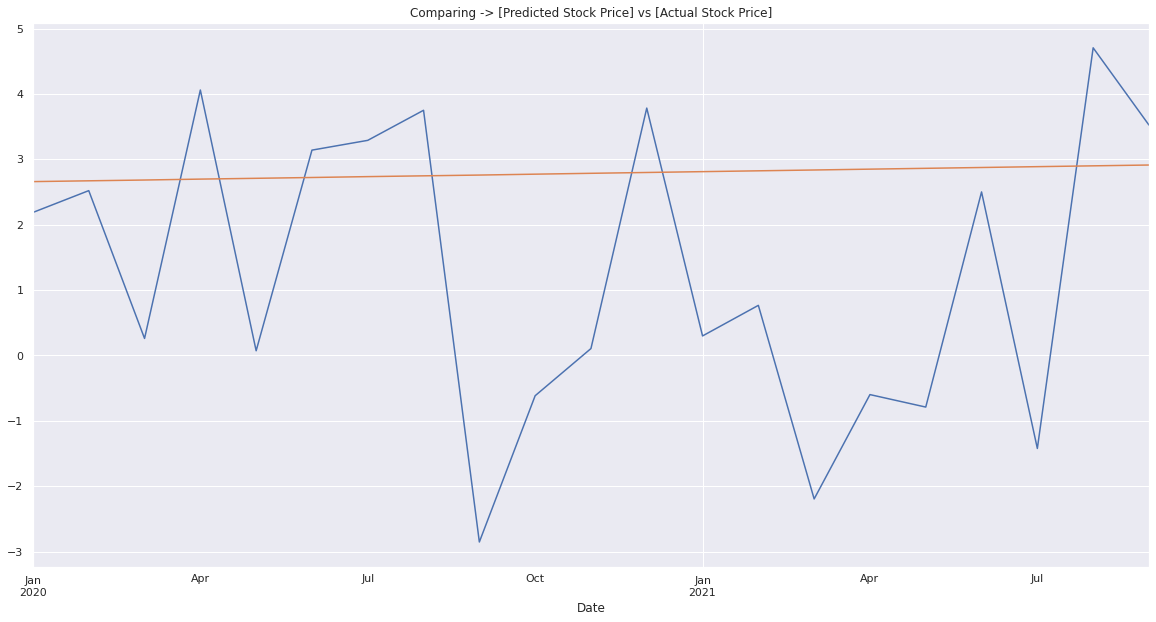

In [29]:
plt.title('Comparing -> [Predicted Stock Price] vs [Actual Stock Price]')
stationary_ts.loc[stationary_ts.index.year > 2019].plot()
predictions.dropna().loc[predictions.index.year > 2019].plot()



---


> Summary, in order to use an ARIMA model to forecast a time series we do the following:

- Split the time series into train and test data.
- Check if the data is seasonal or not (In the case of a stock price it's most likely to be)
- Apply differencing to turn the time series into stationary by using the ADF test (keep doing so until the ADF rejects and saves the order of differencing as d for ARIMA).
- Use the autocorrelation and partial autocorrelation plot to estimate p,P and q,Q (P,Q are in case time series is seasonal)
- Fine tune using GridSearch.


---



In [30]:
def train_arima(p, q, train_per=0.7):
    train_len = int(train_per*len(stationary_ts))
    model = SARIMAX(stationary_ts.iloc[:train_len], 
                    order=(p,2,q),
                    seasonal_order=(1, 0, 0, 12))
    
    start,end = stationary_ts.index.values[train_len], stationary_ts.index.values[-1]
    predictions = result.predict(start=start, end=end)

    plt.title(f'Forecasting Netflix stock price with values of p={p} and q={q}')
    stationary_ts.plot()
    predictions.dropna().plot()
    plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


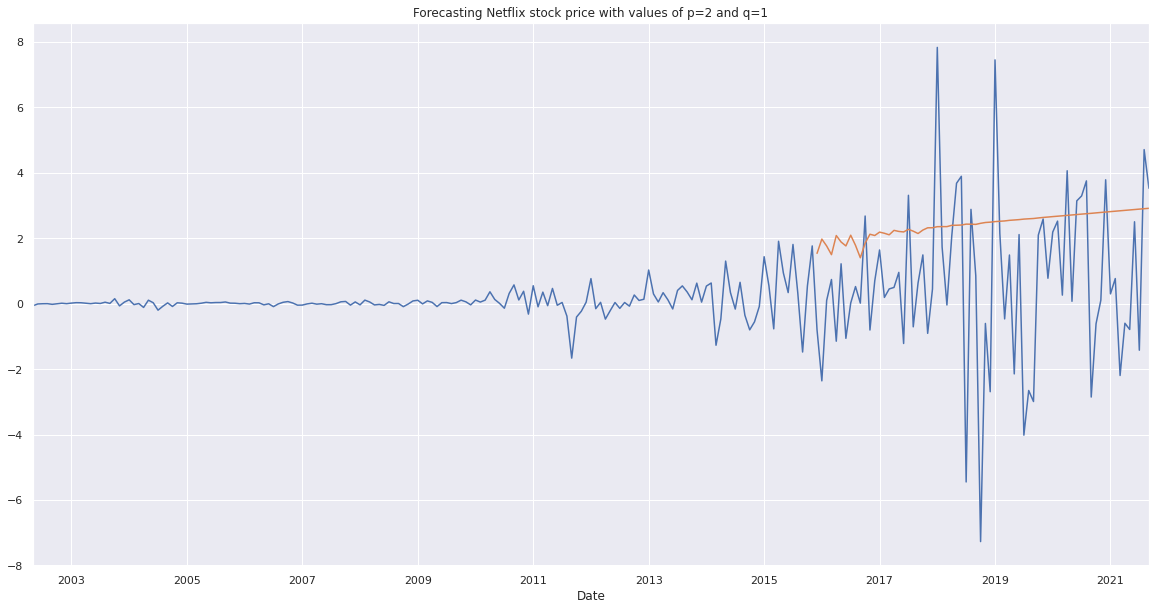

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


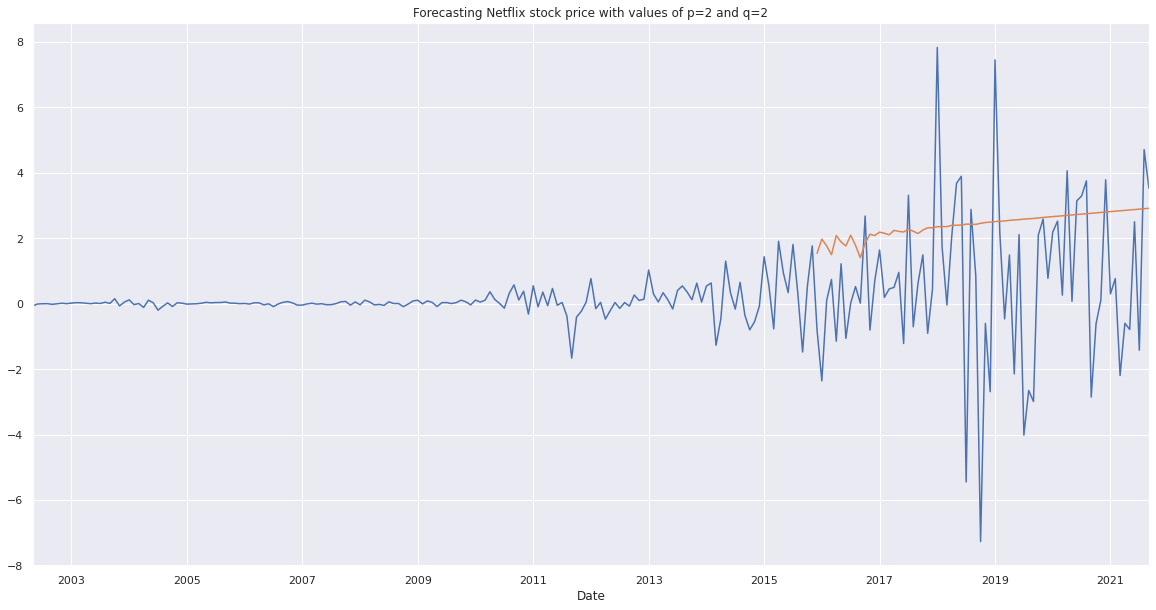

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


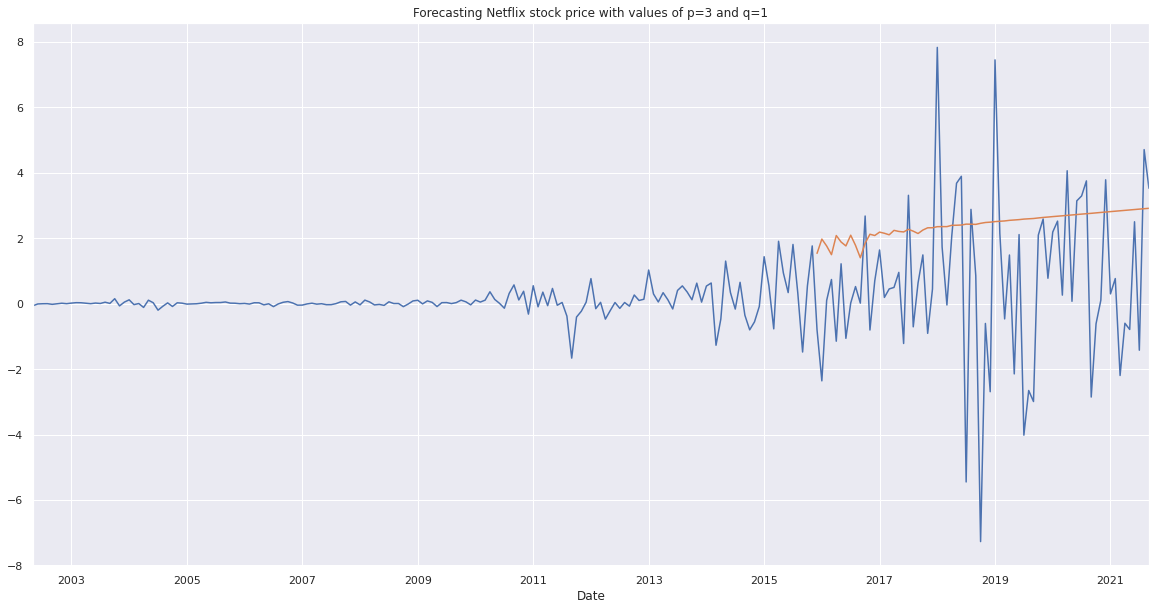

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


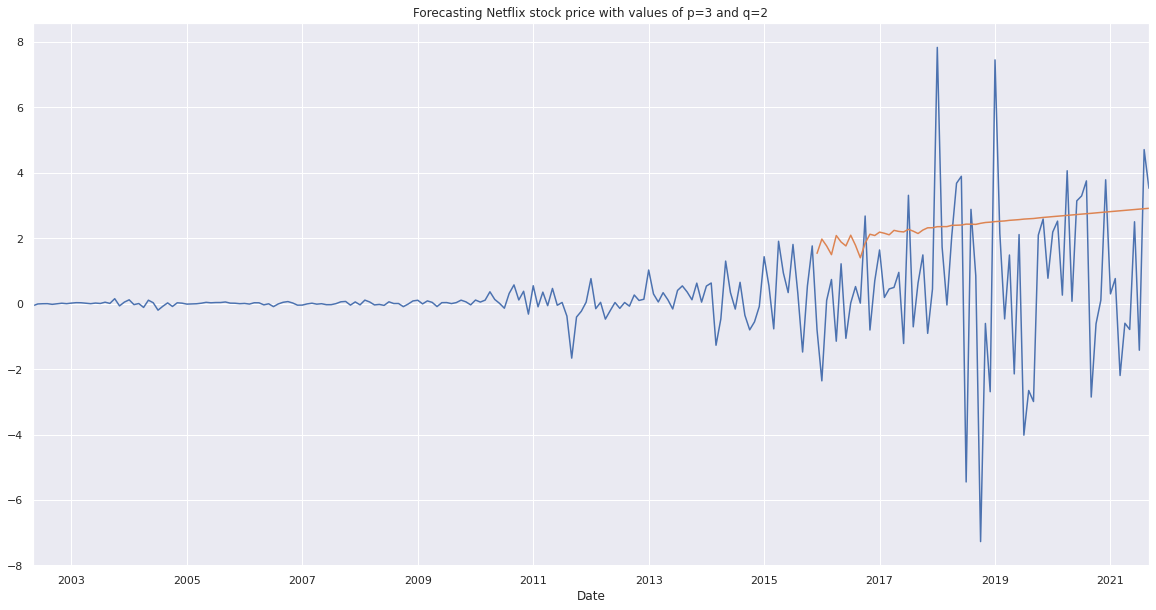

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


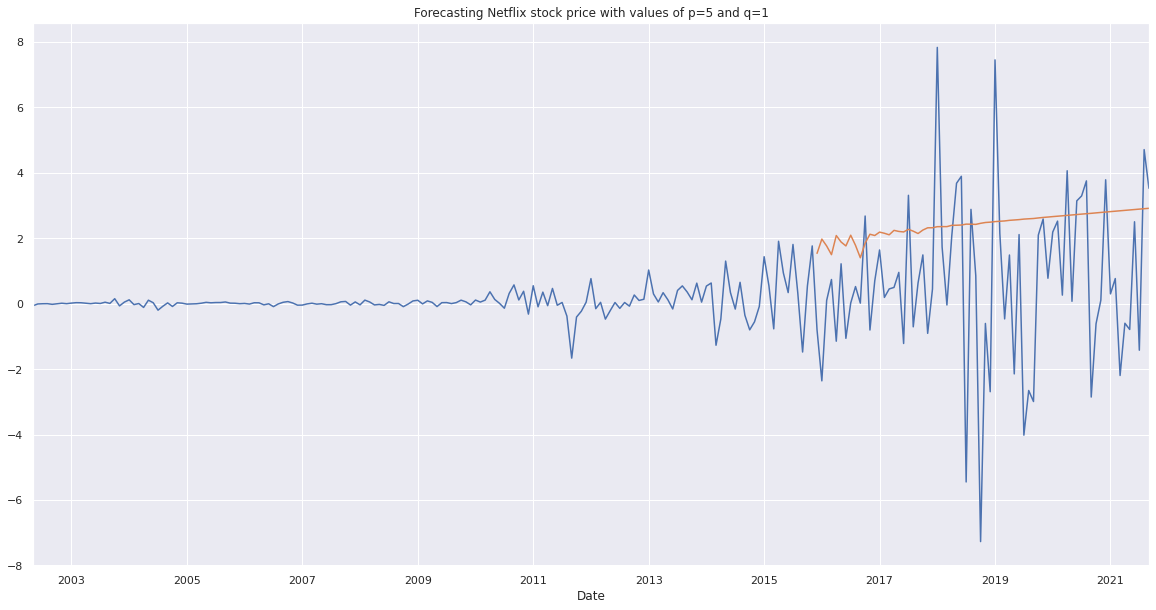

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


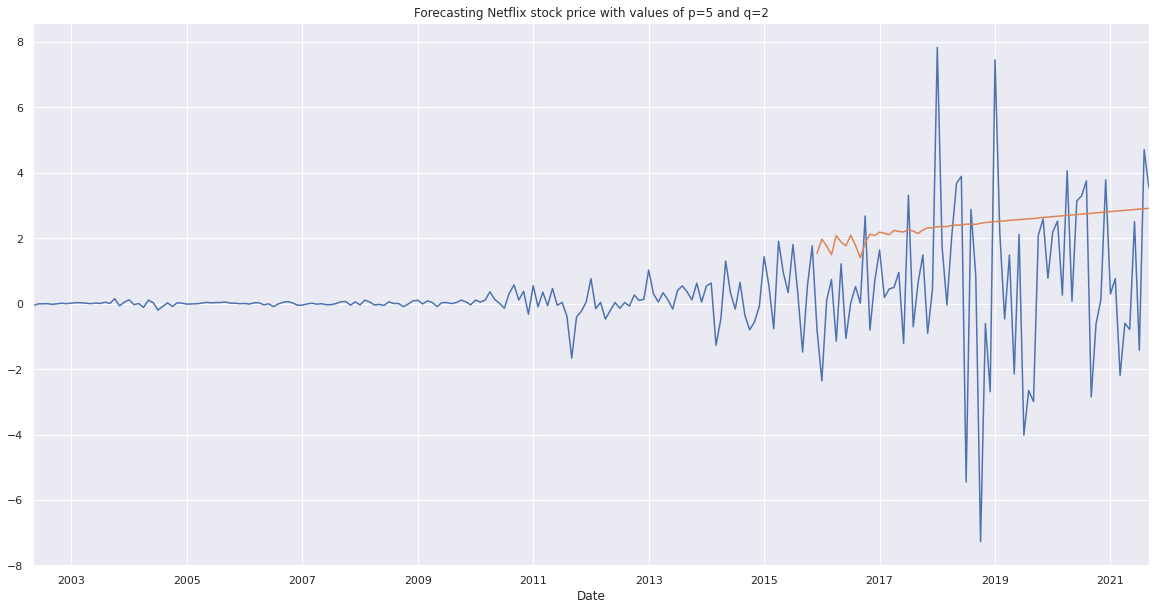

In [31]:
for p in [2, 3, 5]:
    for q in [1, 2]:
        train_arima(p, q)



---

